In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV

In [26]:
# load training data
Xtr_loadpath = 'Xtr.csv'
Xts_loadpath = 'Xts.csv'
ytr_loadpath = 'ytr.csv'

Xtr = np.loadtxt(Xtr_loadpath, delimiter=",")
Xts = np.loadtxt(Xts_loadpath, delimiter=",")
ytr = np.loadtxt(ytr_loadpath, delimiter=",")

In [27]:
# standardize the training data
Xtr_mean = np.mean(Xtr,axis=0)
Xtr_std = np.std(Xtr,axis=0)
ytr_mean = np.mean(ytr)
ytr_std = np.std(ytr)

Xtr_standardized = ((Xtr-Xtr_mean[None,:])/Xtr_std[None,:]) # revise this line as needed
Xts_standardized = ((Xts-Xtr_mean[None,:])/Xtr_std[None,:]) # revise this line as needed
ytr_standardized = ((ytr-ytr_mean)/ytr_std)

# save the standardized training data
Xtr_savepath = 'Xtr_pytorch.csv'
Xts_savepath = 'Xts_pytorch.csv'
ytr_savepath = 'ytr_pytorch.csv'
yts_hat_savepath = 'yts_hat_pytorch.csv'

np.savetxt(Xtr_savepath, Xtr_standardized, delimiter=",")
np.savetxt(Xts_savepath, Xts_standardized, delimiter=",")
np.savetxt(ytr_savepath, ytr_standardized, delimiter=",")

In [31]:
Xtr_feat_sel = Xtr_standardized
# Xtr_feat_sel[:,1] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,3] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,4] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,7] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,10] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,14] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,15] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,16] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,17] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,18] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,19] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,22] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,23] = np.ones(Xtr_feat_sel.shape[0])*1e4
# Xtr_feat_sel[:,24] = np.ones(Xtr_feat_sel.shape[0])*1e4

Xtr_feat_sel[:,1] = Xtr_standardized[:,1]*1e4
Xtr_feat_sel[:,3] = Xtr_standardized[:,3]*1e4
Xtr_feat_sel[:,4] = Xtr_standardized[:,4]*1e4
Xtr_feat_sel[:,7] = Xtr_standardized[:,7]*1e4
Xtr_feat_sel[:,10] = Xtr_standardized[:,10]*1e4
Xtr_feat_sel[:,14] = Xtr_standardized[:,14]*1e4
Xtr_feat_sel[:,15] = Xtr_standardized[:,15]*1e4
Xtr_feat_sel[:,16] = Xtr_standardized[:,16]*1e4
Xtr_feat_sel[:,17] = Xtr_standardized[:,17]*1e4
Xtr_feat_sel[:,18] = Xtr_standardized[:,18]*1e4
Xtr_feat_sel[:,19] = Xtr_standardized[:,19]*1e4
Xtr_feat_sel[:,22] = Xtr_standardized[:,22]*1e4
Xtr_feat_sel[:,23] = Xtr_standardized[:,23]*1e4
Xtr_feat_sel[:,24] = Xtr_standardized[:,24]*1e4

ytr_feat_sel = ytr_standardized

print(Xtr_standardized.shape[0])
print(Xtr_standardized.shape[1])
print(Xtr_feat_sel.shape[0])
print(Xtr_feat_sel.shape[1])

print(ytr_feat_sel)
print(ytr_feat_sel.shape)

10000
26
10000
26
[-0.46508369 -0.36807808 -0.46508369 ...  0.5049724  -0.17406687
 -0.17406687]
(10000,)


In [32]:
print(Xtr_standardized[3,1])
print(Xtr_feat_sel[3,1])

58152319.3050667
58152319.3050667


Rsq_train: 0.1492215550892504


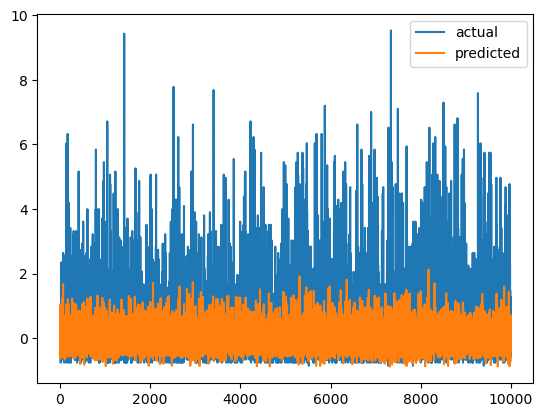

In [18]:
from sklearn import linear_model

# Create linear regression object
# TODO
# regr = ...
regr = linear_model.LinearRegression()

# TODO
regr.fit(Xtr_feat_sel, ytr_standardized)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# TODO
ytr_pred = regr.predict(Xtr_standardized)
plt.plot(ytr_standardized)
plt.plot(ytr_pred)
#plt.plot(ytr)
plt.legend(['actual', 'predicted'])

Rsq_train = regr.score(Xtr_standardized,ytr_standardized)
print('Rsq_train: '+str(Rsq_train))

In [19]:
# train a model (revise this section as needed)
lr = linear_model.LinearRegression()
lr.fit(Xtr_feat_sel, ytr)

# note that random forests use .predict_proba(X)[:,1] instead of .decision_function(X)
r2 = r2_score(ytr,lr.predict(Xtr_standardized))
print('training R2: ',r2)

training R2:  0.1492215550892505
